Student - Filipe do Vale Melo

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import seed
from random import random

In [ ]:
from google.colab import files

files.upload()

Saving seeds_dataset.csv to seeds_dataset.csv


{'seeds_dataset.csv': b'15.26,14.84,0.871,5.763,3.312,2.221,5.22,1\n14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1\n14.29,14.09,0.905,5.291,3.337,2.699,4.825,1\n13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1\n16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1\n14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1\n14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1\n14.11,14.1,0.8911,5.42,3.302,2.70,5.00,1\n16.63,15.46,0.8747,6.053,3.465,2.04,5.877,1\n16.44,15.25,0.888,5.884,3.505,1.969,5.533,1\n15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1\n14.03,14.16,0.8796,5.438,3.201,1.717,5.001,1\n13.89,14.02,0.888,5.439,3.199,3.986,4.738,1\n13.78,14.06,0.8759,5.479,3.156,3.136,4.872,1\n13.74,14.05,0.8744,5.482,3.114,2.932,4.825,1\n14.59,14.28,0.8993,5.351,3.333,4.185,4.781,1\n13.99,13.83,0.9183,5.119,3.383,5.234,4.781,1\n15.69,14.75,0.9058,5.527,3.514,1.599,5.046,1\n14.7,14.21,0.9153,5.205,3.466,1.767,4.649,1\n12.72,13.57,0.8686,5.226,3.049,4.102,4.914,1\n14.16,14.4,0.8584,5.658,3.129,3.072,5.176,1\n14.11,14.26,0.8722,5.5

Function to initialize the network., building the layers and each of their neurons.

In [ ]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [ ]:
seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


Function to calculate the activation of a neuron:

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

Sigmoid function:

In [ ]:
def transfer(activation):
	return 1.0 / (1.0 + np.exp(-activation))

#Forward propagation:
The code below implements a forward propagation.

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

Now let's test the forward propagation:

In [ ]:
# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


#Back Propagate Error

Here is a function that calculates the derivative of the transfer function, which is a sigmoid function, and a function to perform the backpropagation.

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


Let's test them.

In [ ]:
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


#Update Weights:
Form the backpropagated errors, we must update the weights in order to train the network.

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

#Train the Network:
Now let's train the network.

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

Here is a complete example with a simple dataset:

In [ ]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
[{'weights

#Predict
Now we need to make predictions with this network.

In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [ ]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


#Wheat seed problem
Let's see how this network performs with a real world problem, the wheat seeds dataset.

In [ ]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [90.47619047619048, 92.85714285714286, 97.61904761904762, 92.85714285714286, 92.85714285714286]
Mean Accuracy: 93.333%


Now we are going to train a neural network using tensorflow for this same problem, and compare the results.

In [ ]:
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)

In [ ]:
print(dataset)

[['15.26', '14.84', '0.871', '5.763', '3.312', '2.221', '5.22', '1'], ['14.88', '14.57', '0.8811', '5.554', '3.333', '1.018', '4.956', '1'], ['14.29', '14.09', '0.905', '5.291', '3.337', '2.699', '4.825', '1'], ['13.84', '13.94', '0.8955', '5.324', '3.379', '2.259', '4.805', '1'], ['16.14', '14.99', '0.9034', '5.658', '3.562', '1.355', '5.175', '1'], ['14.38', '14.21', '0.8951', '5.386', '3.312', '2.462', '4.956', '1'], ['14.69', '14.49', '0.8799', '5.563', '3.259', '3.586', '5.219', '1'], ['14.11', '14.1', '0.8911', '5.42', '3.302', '2.70', '5.00', '1'], ['16.63', '15.46', '0.8747', '6.053', '3.465', '2.04', '5.877', '1'], ['16.44', '15.25', '0.888', '5.884', '3.505', '1.969', '5.533', '1'], ['15.26', '14.85', '0.8696', '5.714', '3.242', '4.543', '5.314', '1'], ['14.03', '14.16', '0.8796', '5.438', '3.201', '1.717', '5.001', '1'], ['13.89', '14.02', '0.888', '5.439', '3.199', '3.986', '4.738', '1'], ['13.78', '14.06', '0.8759', '5.479', '3.156', '3.136', '4.872', '1'], ['13.74', '14.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv('seeds_dataset.csv')

train_df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


Let's add column headers to this dataframe:

In [ ]:
train_df = pd.read_csv('seeds_dataset.csv', names = ['A','B','C','D','E','F','G','category'])

train_df.head()

,A,B,C,D,E,F,G,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
X = train_df.to_numpy()[:,0:7] 
Y = train_df.to_numpy()[:,7]
seed = 42
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y, 
    stratify=Y, 
    test_size=0.2, 
    random_state=32)

print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (168, 7)
Shape of Test Data : (42, 7)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.fit_transform(y_test.reshape(-1, 1))
np.shape(y_train)

(168, 3)

Let's build our model, with the same settings from the previous network: one hidden layer with 5 neurons and the output layer with one neuron per class (that is, 3 neurons)

In [ ]:
model = Sequential([
  Dense(5, activation='sigmoid', input_dim = (7)),
  Dense(3, activation='sigmoid'),
])

'''
sgd = SGD(lr = 0.01)

model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

'''

adam = Adam(learning_rate=0.01)

model.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
  X_train, # training data
  y_train, # training targets
  epochs = 500,
  batch_size=32, 
  validation_data = (X_test, y_test), 
  verbose = 1
)

Epoch 1/500
6/6 [==============================] - 0s 30ms/step - loss: 1.0852 - accuracy: 0.3333 - val_loss: 1.0756 - val_accuracy: 0.3333
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0806 - accuracy: 0.3333 - val_loss: 1.0718 - val_accuracy: 0.3333
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0703 - accuracy: 0.3333 - val_loss: 1.0642 - val_accuracy: 0.3095
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0671 - accuracy: 0.3333 - val_loss: 1.0586 - val_accuracy: 0.3810
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0603 - accuracy: 0.3631 - val_loss: 1.0494 - val_accuracy: 0.3571
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 1.0550 - accuracy: 0.3214 - val_loss: 1.0436 - val_accuracy: 0.3333
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.3571 - val_loss: 1.0283 - val_accuracy: 0.3333
Epoch 8/500
6/6 [=========

In [ ]:
#@title Função para os plots (la_plots(history))
def la_plots(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    #Epochs
    epochs = range(len(val_loss))

    # Plotting loss
    
    COLOR = 'white'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    

    fig1 = plt.figure(figsize=(8,5))
    gs1 = fig1.add_gridspec(1, 1)
    ax1 = fig1.add_subplot(gs1[0, 0])

    ax1.plot(epochs, loss, 'r', label='Training')
    ax1.plot(epochs, val_loss, 'b', label='Validation')
    ax1.set_xlabel('Epochs', size=16)
    ax1.set_ylabel('Loss', size=16)
    #ax1.set_yscale('log')
    ax1.legend()
    plt.show()

    # Plotting accuracy metric

    fig2 = plt.figure(figsize=(8,5))
    gs2 = fig2.add_gridspec(1, 1)
    ax2 = fig2.add_subplot(gs2[0, 0])

    ax2.plot(epochs, accuracy, 'r', label='Training')
    ax2.plot(epochs, val_accuracy, 'b', label='Validation')
    ax2.set_xlabel('Epochs', size=16)
    ax2.set_ylabel('Accuracy', size=16)
    #ax2.set_yscale('log')
    ax2.legend()
    plt.show()

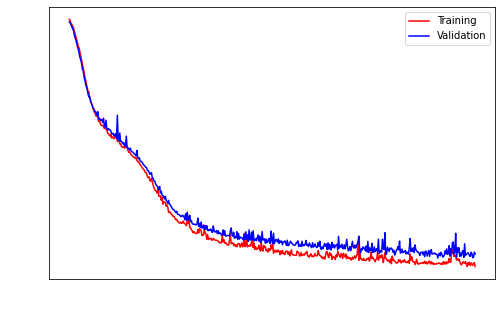

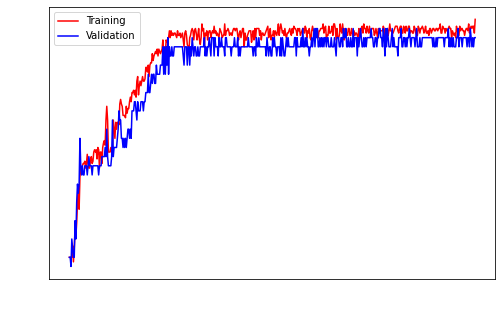

In [ ]:
la_plots(history)

#Cross Validation
Now we are going to repeat the training but using cross validation.

In [ ]:
pip install -q pyyaml h5py

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

Y = train_df[['category']]
                         
skf = StratifiedKFold(n_splits = 10, random_state = 7, shuffle = True)

n_samples = len(Y)

Auxiliary function for getting model name in each of the k iterations:

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

------------------------------------------------------------------------
Training for fold 1 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_1.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy did not improve from 0.33333

Epoch 00006: val_accuracy improved from 0.33333 to 0.47619, saving model to model_1.h5

Epoch 00007: val_accuracy improved from 0.47619 to 0.71429, saving model to model_1.h5

Epoch 00008: val_accuracy improved from 0.71429 to 0.76190, saving model to model_1.h5

Epoch 00009: val_accuracy did not improve from 0.76190

Epoch 00010: val_accuracy did not improve from 0.76190

Epoch 00011: val_accuracy did not improve from 0.76190

Epoch 00012: val_accuracy did not improve from 0.76190

Epoch 00013: val_accuracy did not improve from 0.76190

Epoch 00014: val_accuracy did not improve from 0.

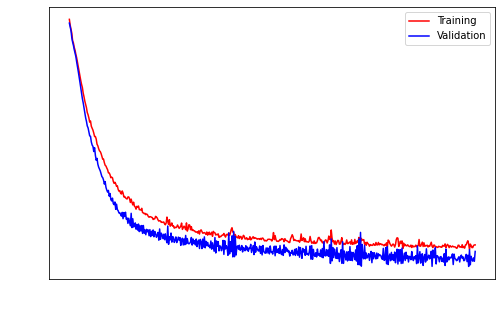

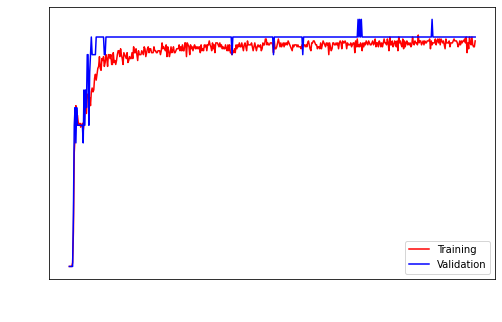

1/1 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 2 ...

Epoch 00001: val_accuracy improved from -inf to 0.38095, saving model to model_2.h5

Epoch 00002: val_accuracy improved from 0.38095 to 0.61905, saving model to model_2.h5

Epoch 00003: val_accuracy did not improve from 0.61905

Epoch 00004: val_accuracy improved from 0.61905 to 0.66667, saving model to model_2.h5

Epoch 00005: val_accuracy did not improve from 0.66667

Epoch 00006: val_accuracy did not improve from 0.66667

Epoch 00007: val_accuracy did not improve from 0.66667

Epoch 00008: val_accuracy did not improve from 0.66667

Epoch 00009: val_accuracy did not improve from 0.66667

Epoch 00010: val_accuracy did not improve from 0.66667

Epoch 00011: val_accuracy did not improve from 0.66667

Epoch 00012: val_accuracy did not improve from 0.66667

Epoch 00013: val_accuracy did not 

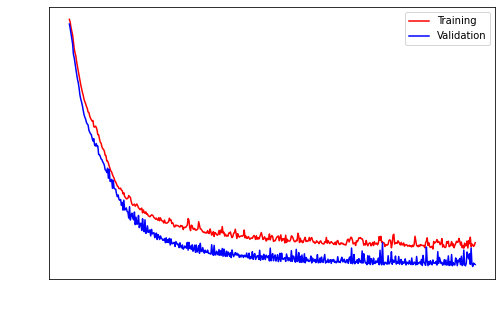

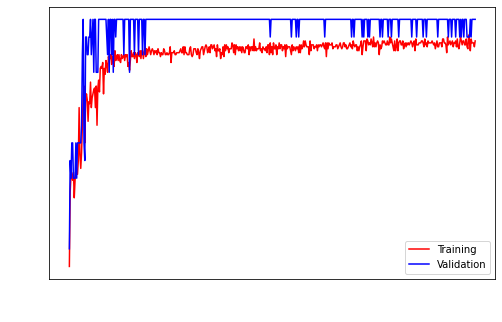

1/1 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 3 ...

Epoch 00001: val_accuracy improved from -inf to 0.28571, saving model to model_3.h5

Epoch 00002: val_accuracy improved from 0.28571 to 0.33333, saving model to model_3.h5

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy did not improve from 0.33333

Epoch 00006: val_accuracy did not improve from 0.33333

Epoch 00007: val_accuracy did not improve from 0.33333

Epoch 00008: val_accuracy did not improve from 0.33333

Epoch 00009: val_accuracy improved from 0.33333 to 0.61905, saving model to model_3.h5

Epoch 00010: val_accuracy did not improve from 0.61905

Epoch 00011: val_accuracy did not improve from 0.61905

Epoch 00012: val_accuracy did not improve from 0.61905

Epoch 00013: val_accuracy did not 

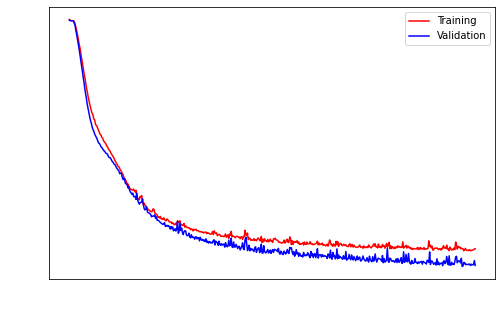

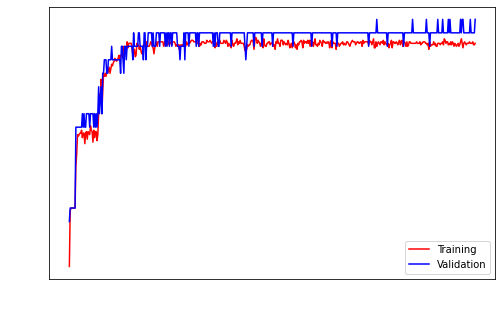

1/1 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 4 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_4.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy did not improve from 0.33333

Epoch 00006: val_accuracy improved from 0.33333 to 0.57143, saving model to model_4.h5

Epoch 00007: val_accuracy did not improve from 0.57143

Epoch 00008: val_accuracy did not improve from 0.57143

Epoch 00009: val_accuracy improved from 0.57143 to 0.71429, saving model to model_4.h5

Epoch 00010: val_accuracy did not improve from 0.71429

Epoch 00011: val_accuracy did not improve from 0.71429

Epoch 00012: val_accuracy did not improve from 0.71429

Epoch 00013: val_accuracy improved

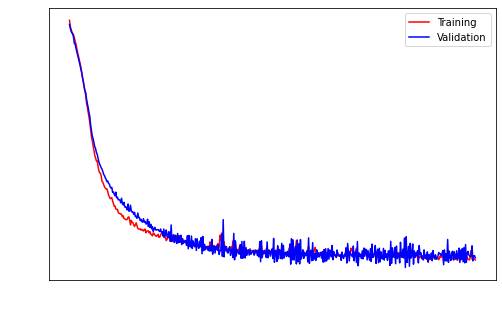

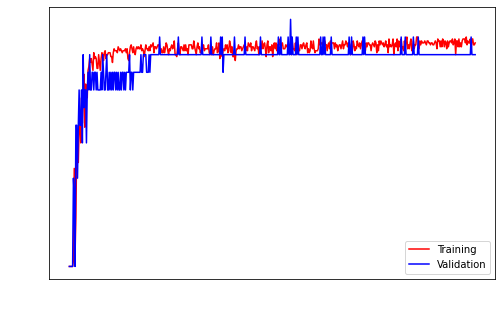

1/1 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 5 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_5.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy did not improve from 0.33333

Epoch 00006: val_accuracy did not improve from 0.33333

Epoch 00007: val_accuracy did not improve from 0.33333

Epoch 00008: val_accuracy did not improve from 0.33333

Epoch 00009: val_accuracy did not improve from 0.33333

Epoch 00010: val_accuracy did not improve from 0.33333

Epoch 00011: val_accuracy improved from 0.33333 to 0.38095, saving model to model_5.h5

Epoch 00012: val_accuracy improved from 0.38095 to 0.47619, saving model to model_5.h5

Epoch 00013: val_accuracy did not 

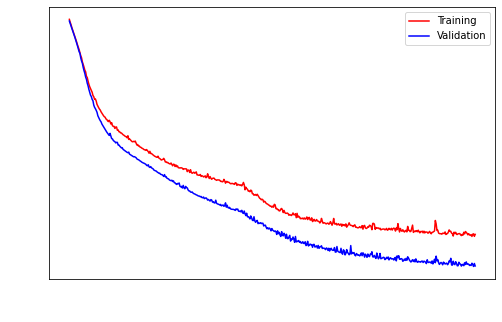

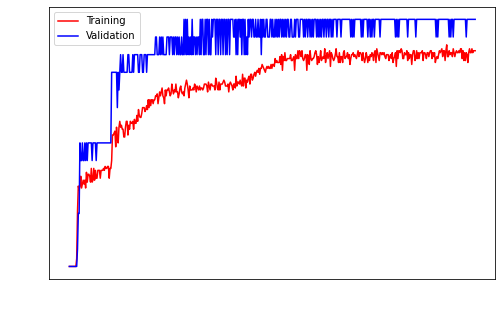

1/1 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 6 ...

Epoch 00001: val_accuracy improved from -inf to 0.42857, saving model to model_6.h5

Epoch 00002: val_accuracy improved from 0.42857 to 0.47619, saving model to model_6.h5

Epoch 00003: val_accuracy improved from 0.47619 to 0.61905, saving model to model_6.h5

Epoch 00004: val_accuracy did not improve from 0.61905

Epoch 00005: val_accuracy did not improve from 0.61905

Epoch 00006: val_accuracy did not improve from 0.61905

Epoch 00007: val_accuracy did not improve from 0.61905

Epoch 00008: val_accuracy improved from 0.61905 to 0.66667, saving model to model_6.h5

Epoch 00009: val_accuracy did not improve from 0.66667

Epoch 00010: val_accuracy improved from 0.66667 to 0.85714, saving model to model_6.h5

Epoch 00011: val_accuracy did not improve from 0.85714

Epoch 00012: val_accuracy 

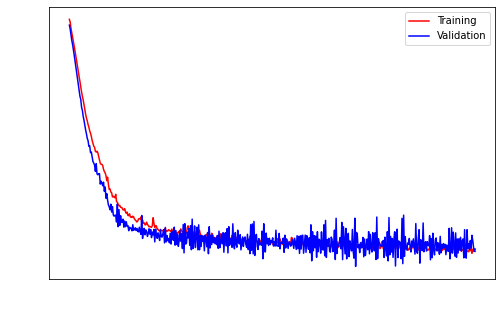

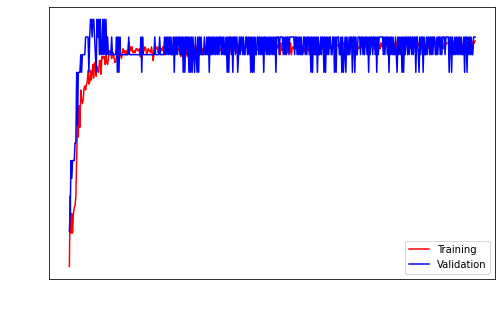

1/1 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 1.0000
accuracy: 100.00%
------------------------------------------------------------------------
Training for fold 7 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_7.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy improved from 0.33333 to 0.52381, saving model to model_7.h5

Epoch 00006: val_accuracy did not improve from 0.52381

Epoch 00007: val_accuracy did not improve from 0.52381

Epoch 00008: val_accuracy improved from 0.52381 to 0.66667, saving model to model_7.h5

Epoch 00009: val_accuracy did not improve from 0.66667

Epoch 00010: val_accuracy did not improve from 0.66667

Epoch 00011: val_accuracy did not improve from 0.66667

Epoch 00012: val_accuracy did not improve from 0.66667

Epoch 00013: val_accuracy did not 

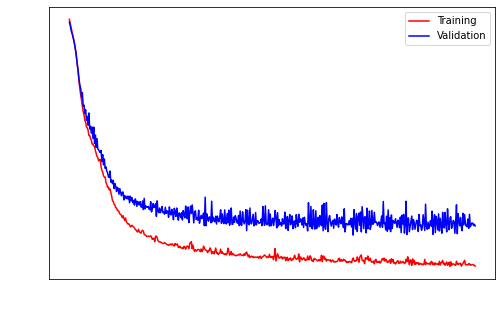

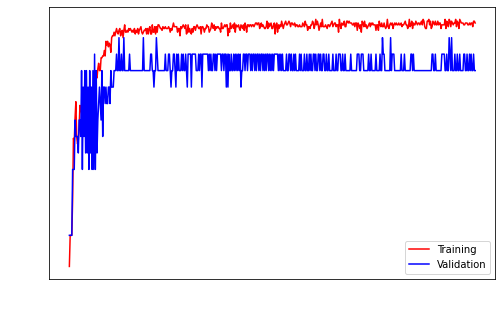

1/1 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.9048
accuracy: 90.48%
------------------------------------------------------------------------
Training for fold 8 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_8.h5

Epoch 00002: val_accuracy improved from 0.33333 to 0.38095, saving model to model_8.h5

Epoch 00003: val_accuracy did not improve from 0.38095

Epoch 00004: val_accuracy did not improve from 0.38095

Epoch 00005: val_accuracy did not improve from 0.38095

Epoch 00006: val_accuracy did not improve from 0.38095

Epoch 00007: val_accuracy did not improve from 0.38095

Epoch 00008: val_accuracy improved from 0.38095 to 0.61905, saving model to model_8.h5

Epoch 00009: val_accuracy did not improve from 0.61905

Epoch 00010: val_accuracy improved from 0.61905 to 0.80952, saving model to model_8.h5

Epoch 00011: val_accuracy did not improve from 0.80952

Epoch 00012: val_accuracy did not improve from 0.80952

Epo

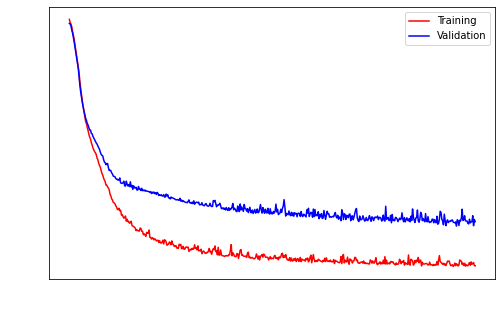

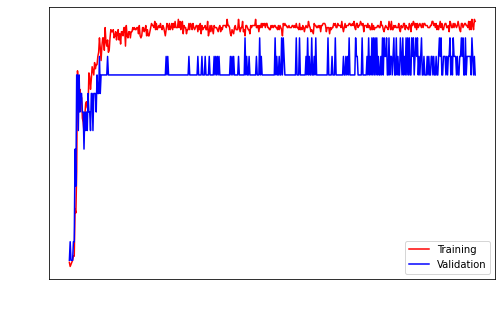

1/1 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.9048
accuracy: 90.48%
------------------------------------------------------------------------
Training for fold 9 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_9.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy improved from 0.33333 to 0.42857, saving model to model_9.h5

Epoch 00005: val_accuracy did not improve from 0.42857

Epoch 00006: val_accuracy did not improve from 0.42857

Epoch 00007: val_accuracy did not improve from 0.42857

Epoch 00008: val_accuracy did not improve from 0.42857

Epoch 00009: val_accuracy did not improve from 0.42857

Epoch 00010: val_accuracy improved from 0.42857 to 0.52381, saving model to model_9.h5

Epoch 00011: val_accuracy improved from 0.52381 to 0.61905, saving model to model_9.h5

Epoch 00012: val_accuracy did not improve from 0.61905

Epo

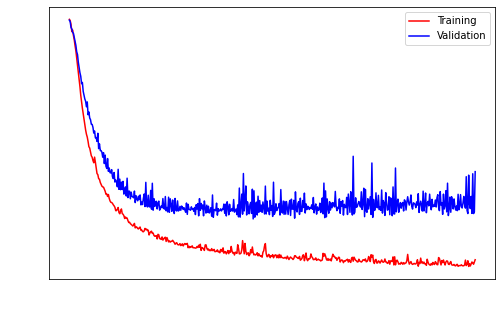

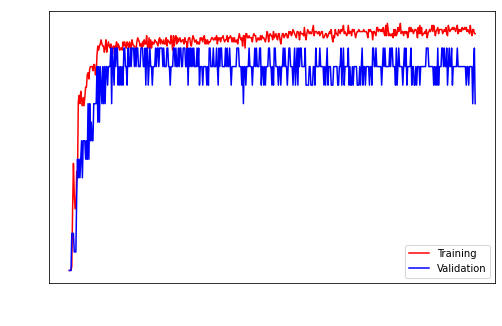

1/1 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.9048
accuracy: 90.48%
------------------------------------------------------------------------
Training for fold 10 ...

Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to model_10.h5

Epoch 00002: val_accuracy did not improve from 0.33333

Epoch 00003: val_accuracy did not improve from 0.33333

Epoch 00004: val_accuracy did not improve from 0.33333

Epoch 00005: val_accuracy did not improve from 0.33333

Epoch 00006: val_accuracy improved from 0.33333 to 0.61905, saving model to model_10.h5

Epoch 00007: val_accuracy did not improve from 0.61905

Epoch 00008: val_accuracy did not improve from 0.61905

Epoch 00009: val_accuracy improved from 0.61905 to 0.76190, saving model to model_10.h5

Epoch 00010: val_accuracy did not improve from 0.76190

Epoch 00011: val_accuracy did not improve from 0.76190

Epoch 00012: val_accuracy improved from 0.76190 to 0.85714, saving model to model_10.h5

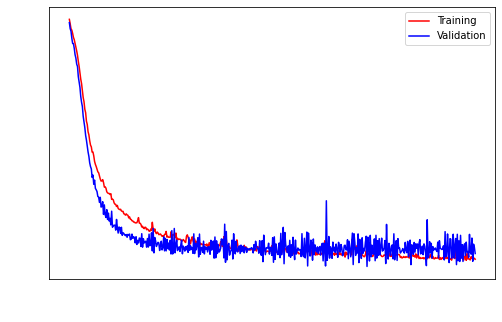

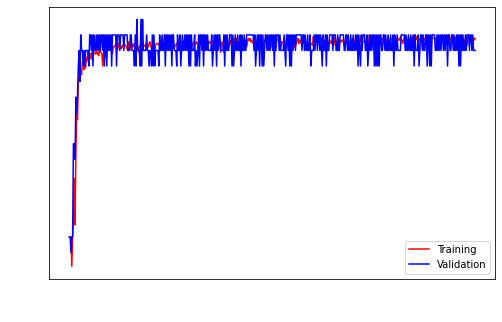

1/1 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 1.0000
accuracy: 100.00%
97.14% (+/- 4.36%)


In [ ]:
from keras import layers
from keras import models

VALIDATION_ACCURACY = []

#save_dir = '/content/drive/My Drive/Deep_Learning/data/tarefa_4/saved_models/'
save_dir = '/content/'
fold_var = 1

num_classes = 3

for train_index, val_index in skf.split(np.zeros(n_samples),Y):
  training_data = train_df.iloc[train_index]
  validation_data = train_df.iloc[val_index]

  X_train = training_data.to_numpy()[:,0:7] 
  y_train = training_data.to_numpy()[:,7]

  X_test = validation_data.to_numpy()[:,0:7]
  y_test = validation_data.to_numpy()[:,7]

  #OneHot Encoding
  encoder = OneHotEncoder(sparse=False)

  y_train = encoder.fit_transform(y_train.reshape(-1, 1))
  y_test = encoder.fit_transform(y_test.reshape(-1, 1))

  # Build the model.
  model = Sequential([
    Dense(5, activation='sigmoid', input_dim = (7)),
    Dense(3, activation='sigmoid'),
  ])

  # Compile the model.
  adam = Adam(learning_rate=0.01)

  model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  # Create Callbacks save the best model
  checkpoint = tf.keras.callbacks.ModelCheckpoint(get_model_name(fold_var), 
              monitor='val_accuracy', verbose=1, 
              save_best_only=True, mode='max')
  callbacks_list = [checkpoint]
  # This saves the best model

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_var} ...')

  history = model.fit(
    X_train, # training data
    y_train, # training targets
    epochs = 500,
    batch_size=32, 
    validation_data = (X_test, y_test), 
    verbose = 0,
    callbacks=callbacks_list
  )

  #PLOT HISTORY
  la_plots(history)

  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights(get_model_name(fold_var))

  scores = model.evaluate(X_test, y_test, verbose=1)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  VALIDATION_ACCURACY.append(scores[1] * 100)

  tf.keras.backend.clear_session()

  fold_var += 1

print("%.2f%% (+/- %.2f%%)" % (np.mean(VALIDATION_ACCURACY), np.std(VALIDATION_ACCURACY)))

We reached an accuracy of 97.14% with this model, using cross validation. 